# Pandas 시각화 기능

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [ ]:
# 런타임 다시 시작

In [5]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

## 예시

In [6]:
np.random.seed(0)
df1 = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2021', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df1.tail()

,A,B,C
2021-04-06,9.396256,6.282026,-11.198087
2021-04-07,10.086074,7.583872,-11.826175
2021-04-08,9.605047,9.887789,-12.886190
2021-04-09,9.469097,11.024680,-12.788465
2021-04-10,10.052051,10.625231,-12.418409


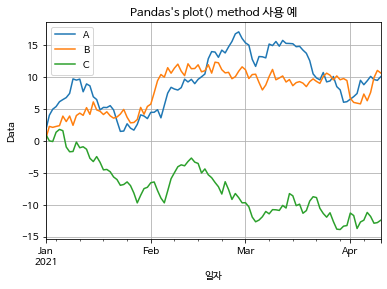

In [11]:
df1.plot()
plt.title('Pandas\'s plot() method 사용 예' )
plt.xlabel('일자')
plt.ylabel('Data')
plt.grid()
plt.show()

## Bar chart

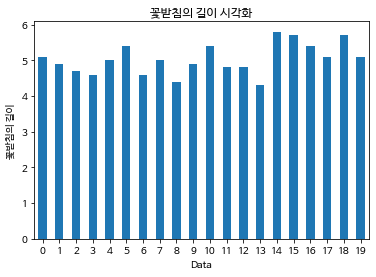

In [31]:
iris.sepal_length[:20].plot(kind='bar', rot=0) # series에서도 plot 제공, rot : x 축에서 범주 이름의 회전을 변경
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

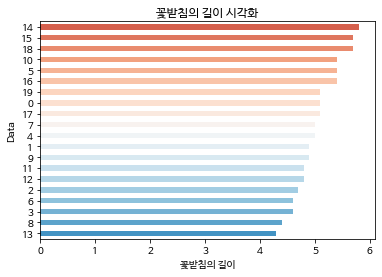

In [32]:
iris.sepal_length[:20].sort_values().plot(kind='barh', rot=0, 
                            color=plt.get_cmap('RdBu')(np.linspace(0.8, 0.2, 20))) # matplotlib cmap palette 색상 이름 참고
plt.title("꽃받침의 길이 시각화")
plt.ylabel("Data")
plt.xlabel("꽃받침의 길이")
plt.show()

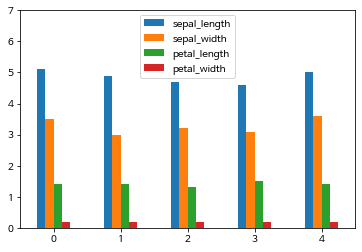

In [37]:
iris[:5].plot.bar(rot=0)
plt.ylim(0, 7)
plt.show()

In [44]:
df2 = iris.groupby(iris.species).mean()
df2.columns.name = 'feature'
df2

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


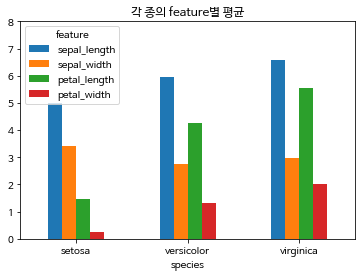

In [46]:
df2.plot.bar(rot=0)
plt.title('각 종의 feature별 평균')
plt.ylim(0, 8)
plt.show()

In [47]:
df2.T   # 각 feature별 종별 평균

species,setosa,versicolor,virginica
feature,,,
sepal_length,5.006,5.936,6.588
sepal_width,3.428,2.770,2.974
petal_length,1.462,4.260,5.552
petal_width,0.246,1.326,2.026


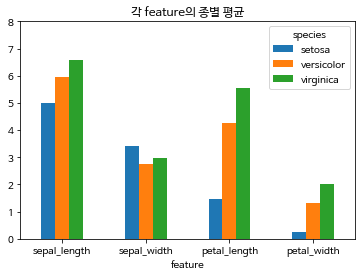

In [48]:
df2.T.plot.bar(rot=0)
plt.title('각 feature의 종별 평균')
plt.ylim(0, 8)
plt.show()

## Pie chart

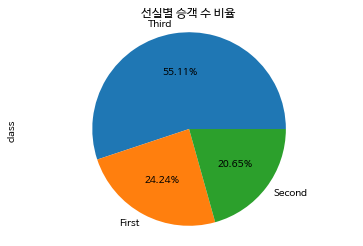

In [50]:
df3 = titanic['class'].value_counts()
df3.plot.pie(autopct = '%.2f%%') # autopct: 부채꼴 안에 표시될 숫자의 형식을 지정
plt.title('선실별 승객 수 비율')
plt.axis('equal') # 원형
plt.show()

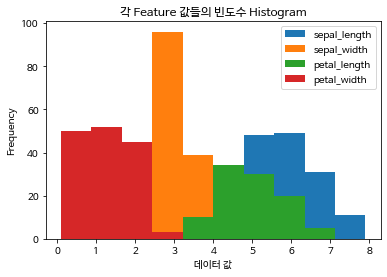

In [51]:
iris.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

## Box plot

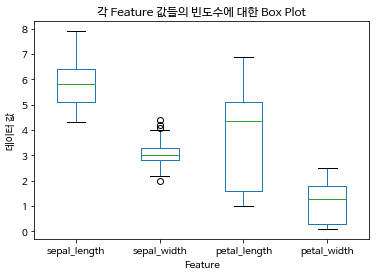

In [52]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()

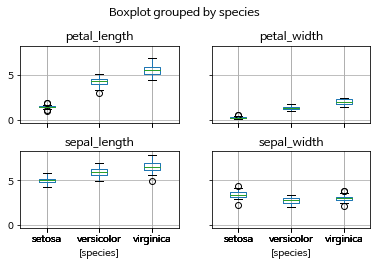

In [58]:
iris.boxplot(by='species') # "각 Feature의 종 별 데이터에 대한 Box Plot"
plt.tight_layout(pad=3, h_pad=1) # pad : 모서리 사이의 여백, h_pad : 높이의 여백, w_pad : 너비의 여백
plt.show()